In [145]:
%load_ext autoreload
%autoreload 2
import os
import sys
from pathlib import Path
import networkx as nx
import pandas as pd
import numpy as np
sys.path.insert(0, Path.cwd().absolute())

BASE_DIR = (Path.cwd()).parent

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [146]:
from network_analysis.flow_assignment import FlowAssignment
from geoprocessing.faf_zone_network import FafZoneNetwork, link_weights
from network_analysis.mc_flow_assignment import sample_flows
import geopandas as gpd

In [212]:
MODE = 'sensitivity' # normal, simple, monte_carlo, compare, sensitivity

SIMPLE_NET = False
MONTE_CARLO = False
if MODE == 'simple':
  SIMPLE_NET = (421, 423, 341, 342 )
if MODE == 'monte_carlo':
  MONTE_CARLO = True

ITER_N = 10000
NORMAL_DIST = True

COLUMN = 'thousand tons in 2020'
COMPARE_COLUMN = 'thousand tons in 2018'

SENSITIVITY_MODE = 'multiplicative' # additive, multiplicative
SENSITIVITY_MODIFIER = 2

In [148]:
naRailNodesDf = gpd.read_file( BASE_DIR / "inputs/NTAD_North_American_Rail_Network_Nodes")
naRailLinesDf = gpd.read_file( BASE_DIR / "inputs/NTAD_North_American_Rail_Network_Lines")
fafZonesDf = gpd.read_file( BASE_DIR / "inputs/2017_CFS_Metro_Areas_with_FAF").to_crs(4326)
fzn = FafZoneNetwork(naRailNodesDf, naRailLinesDf, fafZonesDf).setInputDfColType()
if SIMPLE_NET:
  fzn.fafZonesDf = fzn.fafZonesDf.loc[fzn.fafZonesDf.FAF_Zone.isin(SIMPLE_NET)]
  faf_flows = pd.DataFrame([
    [ 421, 423, 10],
    [421,341, 77],
    [342, 423, 96]
  ], columns=['dms_orig', 'dms_dest', COLUMN])
  display(SIMPLE_NET)
  display(faf_flows)
else:
  faf_flows = pd.read_csv(Path.cwd().parent / 'inputs/faf_freight_flow.csv' )
  display(faf_flows)
fzn.network_weight_fn = link_weights
railnet = fzn.createNetwork()

,dms_orig,dms_dest,sctg2,dms_mode,thousand tons in 2017,thousand tons in 2018,thousand tons in 2019,thousand tons in 2020,thousand tons in 2021,thousand tons in 2022,...,thousand tons in 2035_high,thousand tons in 2040,thousand tons in 2040_low,thousand tons in 2040_high,thousand tons in 2045,thousand tons in 2045_low,thousand tons in 2045_high,thousand tons in 2050,thousand tons in 2050_low,thousand tons in 2050_high
0,11,11,12,2,740.0959,753.5056,851.0898,839.2379,1021.9542,920.2180,...,980.5118,957.7141,895.4462,1006.7947,1036.7981,935.0777,1073.2262,1121.3557,973.4778,1148.8061
1,11,11,19,2,42.0036,46.2087,44.6257,43.4698,43.6799,46.1044,...,21.2153,20.0290,19.1487,20.4295,20.4124,19.1490,20.8206,19.8552,18.2867,20.2523
2,11,11,23,2,12.5502,12.6966,11.8313,11.0730,11.5673,11.7494,...,21.6048,24.6074,24.1112,25.0996,28.1451,27.2151,28.7080,30.9752,29.5641,31.5947
3,11,11,27,2,0.0574,0.0587,0.0563,0.0563,0.0551,0.0536,...,0.0423,0.0395,0.0382,0.0408,0.0395,0.0376,0.0414,0.0390,0.0367,0.0416
4,11,11,28,2,0.0082,0.0083,0.0081,0.0082,0.0085,0.0082,...,0.0129,0.0136,0.0133,0.0144,0.0149,0.0144,0.0161,0.0166,0.0158,0.0182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131010,560,560,17,2,10.4320,10.5149,10.5263,9.0030,10.1474,10.7672,...,10.6214,8.4527,8.3682,10.4027,7.9643,7.8847,10.0297,7.4917,7.4168,9.6411
131011,560,560,19,2,1730.1339,1915.9901,1846.9680,1764.0476,1225.8048,1131.0459,...,2815.3581,2533.2344,2507.9021,3240.5367,2781.5166,2753.7014,3652.9657,3066.9209,3002.4153,4125.9913
131012,560,560,20,2,283.0778,280.2049,267.0370,252.2117,268.3004,247.1620,...,800.1731,650.6673,644.1606,1042.2652,718.8437,711.6553,1242.6647,835.3533,826.9998,1537.8987
131013,560,560,22,2,5.7048,5.6248,6.3645,6.2680,6.7687,4.8812,...,14.5586,10.9627,10.0108,17.7710,11.6026,9.9985,19.7361,13.2972,10.6780,23.5662


In [149]:
faf_flows

,dms_orig,dms_dest,sctg2,dms_mode,thousand tons in 2017,thousand tons in 2018,thousand tons in 2019,thousand tons in 2020,thousand tons in 2021,thousand tons in 2022,...,thousand tons in 2035_high,thousand tons in 2040,thousand tons in 2040_low,thousand tons in 2040_high,thousand tons in 2045,thousand tons in 2045_low,thousand tons in 2045_high,thousand tons in 2050,thousand tons in 2050_low,thousand tons in 2050_high
0,11,11,12,2,740.0959,753.5056,851.0898,839.2379,1021.9542,920.2180,...,980.5118,957.7141,895.4462,1006.7947,1036.7981,935.0777,1073.2262,1121.3557,973.4778,1148.8061
1,11,11,19,2,42.0036,46.2087,44.6257,43.4698,43.6799,46.1044,...,21.2153,20.0290,19.1487,20.4295,20.4124,19.1490,20.8206,19.8552,18.2867,20.2523
2,11,11,23,2,12.5502,12.6966,11.8313,11.0730,11.5673,11.7494,...,21.6048,24.6074,24.1112,25.0996,28.1451,27.2151,28.7080,30.9752,29.5641,31.5947
3,11,11,27,2,0.0574,0.0587,0.0563,0.0563,0.0551,0.0536,...,0.0423,0.0395,0.0382,0.0408,0.0395,0.0376,0.0414,0.0390,0.0367,0.0416
4,11,11,28,2,0.0082,0.0083,0.0081,0.0082,0.0085,0.0082,...,0.0129,0.0136,0.0133,0.0144,0.0149,0.0144,0.0161,0.0166,0.0158,0.0182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131010,560,560,17,2,10.4320,10.5149,10.5263,9.0030,10.1474,10.7672,...,10.6214,8.4527,8.3682,10.4027,7.9643,7.8847,10.0297,7.4917,7.4168,9.6411
131011,560,560,19,2,1730.1339,1915.9901,1846.9680,1764.0476,1225.8048,1131.0459,...,2815.3581,2533.2344,2507.9021,3240.5367,2781.5166,2753.7014,3652.9657,3066.9209,3002.4153,4125.9913
131012,560,560,20,2,283.0778,280.2049,267.0370,252.2117,268.3004,247.1620,...,800.1731,650.6673,644.1606,1042.2652,718.8437,711.6553,1242.6647,835.3533,826.9998,1537.8987
131013,560,560,22,2,5.7048,5.6248,6.3645,6.2680,6.7687,4.8812,...,14.5586,10.9627,10.0108,17.7710,11.6026,9.9985,19.7361,13.2972,10.6780,23.5662


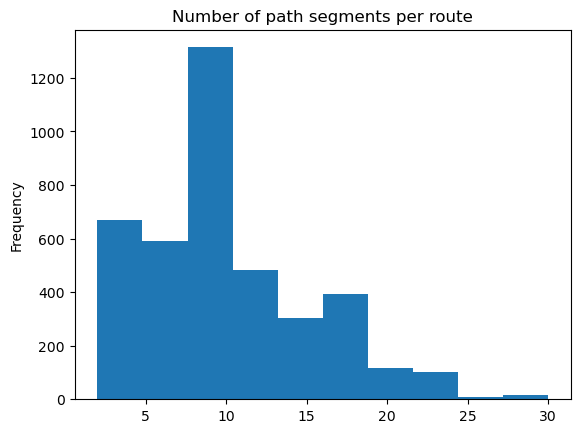

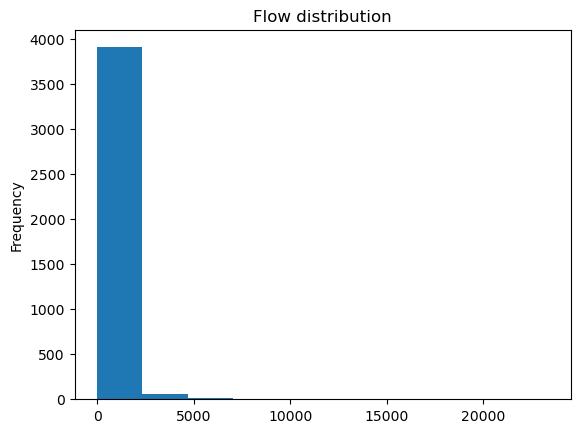

Mean: 9.902402402402402
Count:  3999


In [213]:
import matplotlib.pyplot as plt


fa = FlowAssignment(railnet)

railnet_flows = fa.run(faf_flows, SUM_COLUMN=COLUMN) # For comparison, if Monte Carlo mode

if MODE == 'compare':
  compare_flows = fa.run(faf_flows, SUM_COLUMN=COMPARE_COLUMN)
  fzn.apply_flows((railnet_flows - compare_flows).to_dict())

if MODE == 'sensitivity':
  
  modified_rows = []
  summ_faf_flows = fa.faf_flows_to_df(faf_flows, SUM_COLUMN=COLUMN)
  
  summ_faf_flows['segment_count'] = fa.path_segments.groupby(['dms_orig', 'dms_dest']).count()['seg_start']
  summ_faf_flows['segment_count'].plot(
    kind='hist',
    title='Number of path segments per route'
  )
  plt.show()

  summ_faf_flows[COLUMN + '_sum'].plot(kind='hist', title='Flow distribution')
  plt.show()
  print('Mean:', summ_faf_flows['segment_count'].mean())
  print('Count: ', len(summ_faf_flows))
  
  for row_id, row in summ_faf_flows.sample(1000).iterrows():
    # print(row_id, summ_faf_flows.loc[row_id, 'segment_count'])
    # modified_amount = 1.5 # np.random.uniform(-1,1) + 1
    # temp_summ_faf_flows = summ_faf_flows.copy()
    summ_faf_flows['input_flows_sum'] = summ_faf_flows[COLUMN + '_sum']
    if SENSITIVITY_MODE == 'additive':
      summ_faf_flows.loc[row_id, 'input_flows_sum'] = summ_faf_flows.loc[row_id, 'input_flows_sum'] + SENSITIVITY_MODIFIER
    else:
      summ_faf_flows.loc[row_id, 'input_flows_sum'] = round(summ_faf_flows.loc[row_id, 'input_flows_sum'] * SENSITIVITY_MODIFIER)
    
    iteration_flow = fa.run(SUM_COLUMN='input_flows', faf_flows_by_pair=summ_faf_flows)
    
    modified_rows.append([
      row_id,
      summ_faf_flows.loc[row_id, 'segment_count'],
      summ_faf_flows.loc[row_id, 'input_flows_sum'] - summ_faf_flows.loc[row_id, COLUMN + '_sum'],
      SENSITIVITY_MODIFIER,
      iteration_flow.mean()
    ])

if MODE == 'normal':
  fzn.apply_flows(railnet_flows.to_dict())

if MONTE_CARLO:
  monte_railnet_flows = []
  monte_inputs = []
  for i in range(ITER_N):
    iteration_inputs = sample_flows(faf_flows, COLUMN, distribution='normal' if NORMAL_DIST else 'triangular')
    monte_inputs.append(iteration_inputs)
    faf_flows['input_flows'] = iteration_inputs
    iteration_flow = fa.run(faf_flows, SUM_COLUMN='input_flows')
    monte_railnet_flows.append(iteration_flow)
  monte_railnet_flows = pd.concat(monte_railnet_flows, axis=1)
  monte_railnet_flows.columns=range(ITER_N)
  fzn.fafZoneLinksDf['flows'] = monte_railnet_flows.mean(axis=1)
  fzn.fafZoneLinksDf['flow_covs'] = monte_railnet_flows.std(axis=1) / monte_railnet_flows.mean(axis=1)
  railnet_flows.index = railnet_flows.index.set_names({'seg_start':'FAF_Zone_fr', 'seg_end':'FAF_Zone_to'})
  fzn.fafZoneLinksDf['flow_df'] = (fzn.fafZoneLinksDf['flows'] - railnet_flows).abs()
  fzn.fafZoneLinksDf['flow_df_percent'] = fzn.fafZoneLinksDf['flow_df'] / railnet_flows

,modified_row_segment_n,modified_amount_raws,modified_amount,mean_flow,mean_flow_diff
route,,,,,
"(61, 221)",10.0,110,2,25031.105882,4.313725
"(362, 411)",20.0,4,2,25027.105882,0.313725
"(19, 393)",8.0,46,2,25028.235294,1.443137
"(121, 486)",12.0,202,2,25036.298039,9.505882
"(131, 179)",8.0,2568,2,25107.356863,80.564706
...,...,...,...,...,...
"(12, 411)",16.0,1,2,25026.854902,0.062745
"(41, 460)",10.0,116,2,25031.341176,4.549020
"(209, 279)",6.0,345,2,25034.909804,8.117647


<Axes: title={'center': 'Mean flow vs. segment count'}, xlabel='modified_row_segment_n', ylabel='mean_flow_diff'>

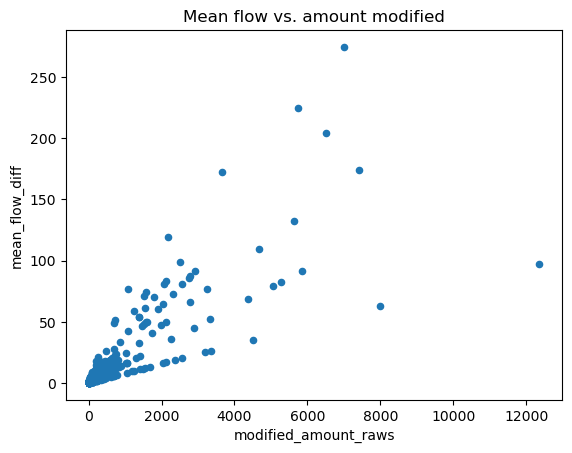

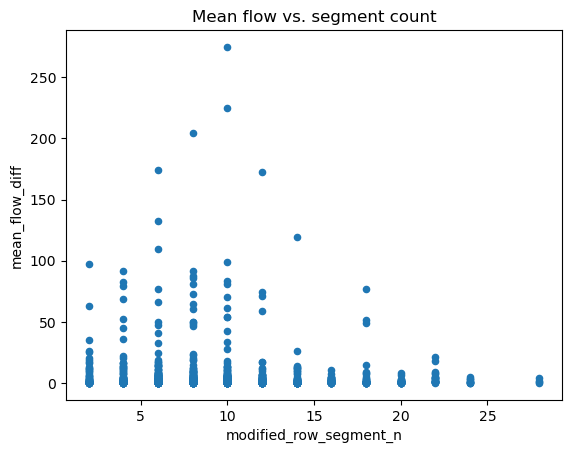

In [214]:
impact_summary = pd.DataFrame(modified_rows).set_index(0)
impact_summary.columns = ['modified_row_segment_n', 'modified_amount_raws', 'modified_amount', 'mean_flow']
impact_summary.index.name = 'route'
impact_summary['mean_flow_diff'] = impact_summary['mean_flow'] - railnet_flows.mean()
display(impact_summary)
impact_summary.plot(x='modified_amount_raws', y='mean_flow_diff', kind='scatter', title='Mean flow vs. amount modified')
impact_summary.plot(x='modified_row_segment_n', y='mean_flow_diff', kind='scatter', title='Mean flow vs. segment count')

In [ ]:
import matplotlib.pyplot as plt


fa = FlowAssignment(railnet)

railnet_flows = fa.run(faf_flows, SUM_COLUMN=COLUMN) # For comparison, if Monte Carlo mode

if MODE == 'compare':
  compare_flows = fa.run(faf_flows, SUM_COLUMN=COMPARE_COLUMN)
  fzn.apply_flows((railnet_flows - compare_flows).to_dict())

if MODE == 'sensitivity':
  
  modified_rows = []
  summ_faf_flows = fa.faf_flows_to_df(faf_flows, SUM_COLUMN=COLUMN)
  
  summ_faf_flows['segment_count'] = fa.path_segments.groupby(['dms_orig', 'dms_dest']).count()['seg_start']
  summ_faf_flows['segment_count'].plot(
    kind='hist',
    title='Number of path segments per route'
  )

  summ_faf_flows[COLUMN + '_sum'].plot(kind='hist', title='Flow distribution')
  print('Mean:', summ_faf_flows['segment_count'].mean())
  print('Count: ', len(summ_faf_flows))
  
  for row_id, row in summ_faf_flows.sample(1000).iterrows():
    # print(row_id, summ_faf_flows.loc[row_id, 'segment_count'])
    modified_amount = 1.5 # np.random.uniform(-1,1) + 1
    # temp_summ_faf_flows = summ_faf_flows.copy()
    summ_faf_flows['input_flows_sum'] = summ_faf_flows[COLUMN + '_sum']
    summ_faf_flows.loc[row_id, 'input_flows_sum'] = round(summ_faf_flows.loc[row_id, 'input_flows_sum'] * modified_amount)
    
    iteration_flow = fa.run(SUM_COLUMN='input_flows', faf_flows_by_pair=summ_faf_flows)
    
    modified_rows.append([
      row_id,
      summ_faf_flows.loc[row_id, 'segment_count'],
      summ_faf_flows.loc[row_id, 'input_flows_sum'],
      modified_amount,
      iteration_flow.mean()
    ])
  # sense_railnet_flows = pd.concat(sense_railnet_flows, axis=1)
  # sense_railnet_flows.columns=range(ITER_N)
  # fzn.fafZoneLinksDf['flow_covs'] = monte_railnet_flows.std(axis=1) / monte_railnet_flows.mean(axis=1)
  # railnet_flows.index = railnet_flows.index.set_names({'seg_start':'FAF_Zone_fr', 'seg_end':'FAF_Zone_to'})
  # fzn.fafZoneLinksDf['flow_df'] = (fzn.fafZoneLinksDf['flows'] - railnet_flows).abs()
  # fzn.fafZoneLinksDf['flow_df_percent'] = fzn.fafZoneLinksDf['flow_df'] / railnet_flows

if MODE == 'normal':
  fzn.apply_flows(railnet_flows.to_dict())

if MONTE_CARLO:
  monte_railnet_flows = []
  monte_inputs = []
  for i in range(ITER_N):
    iteration_inputs = sample_flows(faf_flows, COLUMN, distribution='normal' if NORMAL_DIST else 'triangular')
    monte_inputs.append(iteration_inputs)
    faf_flows['input_flows'] = iteration_inputs
    iteration_flow = fa.run(faf_flows, SUM_COLUMN='input_flows')
    monte_railnet_flows.append(iteration_flow)
  monte_railnet_flows = pd.concat(monte_railnet_flows, axis=1)
  monte_railnet_flows.columns=range(ITER_N)
  fzn.fafZoneLinksDf['flows'] = monte_railnet_flows.mean(axis=1)
  fzn.fafZoneLinksDf['flow_covs'] = monte_railnet_flows.std(axis=1) / monte_railnet_flows.mean(axis=1)
  railnet_flows.index = railnet_flows.index.set_names({'seg_start':'FAF_Zone_fr', 'seg_end':'FAF_Zone_to'})
  fzn.fafZoneLinksDf['flow_df'] = (fzn.fafZoneLinksDf['flows'] - railnet_flows).abs()
  fzn.fafZoneLinksDf['flow_df_percent'] = fzn.fafZoneLinksDf['flow_df'] / railnet_flows

In [190]:
summ_faf_flows

thousand tons in 2020_sum  segment_count  input_flows_sum
dms_orig dms_dest                                                           
11       11                             1945            NaN             1945
         12                              269            4.0              269
         19                             1199            2.0             1199
         20                                0            NaN                0
         42                                8           14.0                8
...                                      ...            ...              ...
551      559                             815            2.0              815
         560                            6511            8.0             6511
559      559                            6925            NaN             6925
         560                            7407            6.0             7407
560      560                           14612            NaN            14612

[6520 rows x 3 columns]

,FAF_Zone_1_fr,FAF_Zone_1_to,flowr
0,"Houston-The Woodlands, TX CFS Area",Remainder of Texas,10899.0
1,"Corpus Christi-Kingsville-Alice, TX CFS Area",Remainder of Texas,7731.0
2,"Lake Charles-Jennings, LA CFS Area",Remainder of Louisiana,6289.0
3,"Dallas-Fort Worth, TX-OK CFS Area (TX Part)",Remainder of Texas,2240.0
4,"Minneapolis-St. Paul, MN-WI CFS Area (MN Part)",Remainder of Wisconsin\r,1806.0
5,Remainder of Oklahoma,Remainder of Texas,1248.0
6,"Laredo, TX CFS Area",Remainder of Texas,1235.0
7,"Lake Charles-Jennings, LA CFS Area","Beaumont-Port Arthur, TX CFS Area",1216.0
8,"Cleveland-Akron-Canton, OH CFS Area",Remainder of Ohio,1151.0
9,"New Orleans-Metairie-Hammond, LA-MS CFS Area ...",Remainder of Louisiana,1150.0


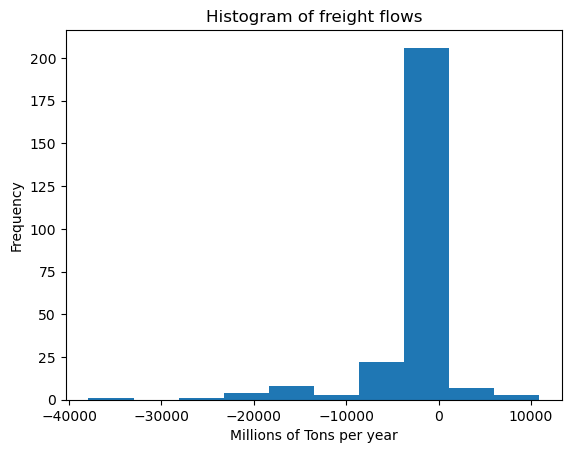

In [ ]:
import matplotlib.pyplot as plt

import folium
import branca.colormap as cm
from IPython.display import display


min_lat=24.7433195
max_lat=49.3457868
min_lon=-124.7844079
max_lon=-66.9513812


m = folium.Map(
  max_bounds=True,
  location=[42, -95],
  zoom_start=4,
  min_zoom=4,
  tiles='OpenStreetMap',
  # max_lat=max_lat,
  # min_lon=min_lon,
  # max_lon=max_lon,
  # min_lat=min_lat
)

m.fit_bounds([[min_lat, min_lon], [max_lat, max_lon]])
wmax = fzn.fafZoneLinksDf['flows'].max()
wmin = fzn.fafZoneLinksDf['flows'].min()

def select_flows(feature):
  return feature['properties']['flows']

def norm_w(feature):
  return (select_flows(feature) - wmin)/(wmax-wmin)

def norm_abs_fn(feature):
  value = select_flows(feature)
  return value/(wmax if value > 0 else -wmin)

lineWeightMax = 4
lineWeightMin = 0.75

if True:
  zoneDf = fzn.fafZonesDf.copy()
  zoneDf.geometry = zoneDf.geometry.simplify(.15)
  zoneDf[['FAF_Zone_1', 'geometry']].explore(
    m=m,
    column='FAF_Zone_1',
    cmap='Greens',
    legend=False,
    style_kwds={'opacity':.1}
  )

if False: 
  from folium import DivIcon
  for i, r in fzn.fafZoneLinksDf.iterrows():
    center = r.geometry.centroid
    folium.map.Marker(
      [center.y, center.x],
      icon=DivIcon(
          icon_size=(20,150),
          icon_anchor=(0,0),
          html='<div style="font-size: 12px">%s</div>' % round(r.flows,4),
        )
    ).add_to(m)


  for i, r in fzn.fafZoneNodesDf.iterrows():
    center = r.geometry.centroid
    folium.map.Marker(
      [center.y, center.x],
      icon=DivIcon(
          icon_size=(20,150),
          icon_anchor=(0,0),
          html='<div style="font-size: 16px; font-weight: bold">%s</div>' % int(i),
        )
    ).add_to(m)


fzn.fafZoneLinksDf[['FAF_Zone_1_fr', 'FAF_Zone_1_to', 'flows', 'geometry']].explore(
  m=m,
  column='flows',
  style_kwds={
    'style_function': lambda feature: {
      'color': cm.linear.plasma(norm_w(feature)),
      'weight': norm_w(feature) * (lineWeightMax - lineWeightMin) + lineWeightMin
    } if MODE != 'compare' else {
      'color': cm.linear.RdYlGn_11(norm_abs_fn(feature) + .5),
      'weight': abs(norm_abs_fn(feature)) * 3 + 1,
      # 'yooo': print(abs(norm_abs_fn(feature)) if select_flows(feature) < 0 else False)
    }
  }
)

fzn.fafZoneNodesDf[['FAF_Zone_1', 'geometry']].explore(
  m=m,
  color='black'
)
display(m)
if MONTE_CARLO:
  fzn.fafZoneLinksDf['flow_df%'] = (fzn.fafZoneLinksDf['flow_df_percent'] * 100).round(2)
fzn.fafZoneLinksDf['flowr'] = fzn.fafZoneLinksDf['flows'].round()

display(fzn.fafZoneLinksDf.sort_values('flows', axis=0, ascending=False).reset_index()[
  ['FAF_Zone_1_fr', 'FAF_Zone_1_to', 'flowr'] + (['flow_df%', 'flow_covs', 'flow_df', ] if MONTE_CARLO else [])
].head(10))
fzn.fafZoneLinksDf['flows'].plot(
  kind='hist',
  title='Histogram of freight flows',
  xlabel='Millions of Tons per year'
)
plt.show()

if MONTE_CARLO:
  from matplotlib.ticker import PercentFormatter

  diff_percents = monte_railnet_flows.sub(railnet_flows, axis=0).abs().div(railnet_flows, axis=0).mul(100, axis=0)
  plot = diff_percents.T.expanding().mean().abs().mean(axis=1).plot(
    title='Monte Carlo Simulation Convergence',
    xlabel='Iterations',
    ylabel='Precent Error'
  )
  plot.yaxis.set_major_formatter(PercentFormatter())
  plt.show()
  avg_diff_percents = diff_percents.mean(axis=1)
  fzn.fafZoneLinksDf.loc[~np.isfinite(fzn.fafZoneLinksDf.flow_df_percent), 'flow_df_percent'] = 0
  plot = avg_diff_percents.plot(
    kind='hist',
    title='Histogram of flow errors in percent',
    xlabel='Percent Error'
  )
  mean_error = avg_diff_percents.mean()
  plt.axvline(mean_error, color='k')
  plot.xaxis.set_major_formatter(PercentFormatter())
  
  min_ylim, max_ylim = plt.ylim()
  plt.text(mean_error * 1.1, max_ylim*0.9, 'Mean: {:.4f}%'.format(mean_error))
  plt.show()